# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import groupby
%matplotlib inline

In [5]:
def read_edge_file(pathname):
    f = open(pathname, 'r')
    G = nx.Graph()
    for line in f:
        if line[0] == '#':
            continue
        line = f.readline().split(',')
        G.add_edge(int(line[0]) , int(line[1]))
    f.close()
    return G

In [6]:
G1 = read_edge_file('../data/network1.csv')

In [7]:
print("The network has", len(G1), "nodes", "and", G1.size(), "edges")

The network has 8419 nodes and 9292 edges


#### Exercise 2.2:  Node degree distribution

In [8]:
def compute_deg_dist(graph):
    degrees = nx.degree(graph)
    # map degree to number of nodes having that degree
    deg_distr = {}
    num_nodes = len(degrees.keys())
    for deg in degrees.values():
        deg_distr.setdefault(deg, 0)
        deg_distr[deg] += 1
    deg_distr = {k: (deg_distr[k] / num_nodes) for k in deg_distr.keys()}
    return deg_distr

In [9]:
deg_distr = compute_deg_dist(G1)

In [10]:
from scipy.stats import poisson
mle_poisson = lambda sample, n: sum(sample[:n]) / n # use mle to find mu
# prob(X = x) => poisson.pmf(x, lambda) e.g. probability mass function
# prob(X < x) => poisson.cdf(x, mu)

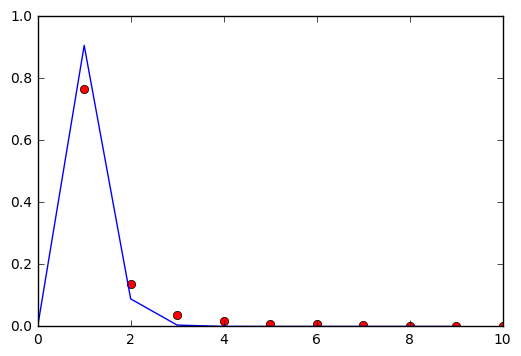

In [12]:
N = 10
plt.plot(list(deg_distr.keys())[:N], list(deg_distr.values())[:N], 'ro')
mu = mle_poisson(list(deg_distr.values()), N)
gen_data = [poisson.pmf(x, mu, 1) for x in range(N)]
plt.plot(gen_data)

#### Exercise 2.3: Giant component

In [13]:
connected_components = sorted(nx.connected_components(G1), key=len, reverse=True)

480


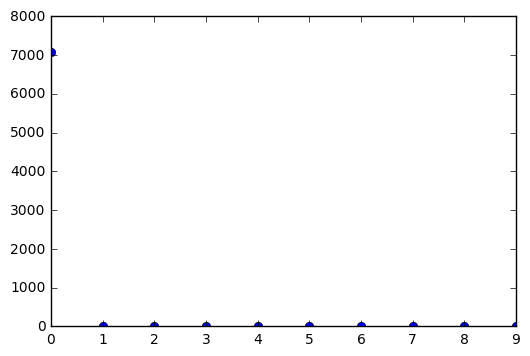

In [19]:
num_of_connected_components = len(connected_components)
print(num_of_connected_components)
dimensions = [len(cc) for cc in connected_components]
plt.plot(dimensions[:10], 'o')

In [15]:
# There is a giant component
print("Size of giant components", len(connected_components[0]))

Size of giant components 7077


#### Exercise 2.4: Short paths & Small-worlds

In [17]:
avg_shortest = nx.average_shortest_path_length(G1)
print("Average shortest path", avg_shortest)

NetworkXError: Graph is not connected.

In [23]:
from itertools import combinations

def path_length_distribution(graph, component):
    couples = combinations(component, 2)
    return sorted(map(lambda couple: nx.shortest_path_length(graph,
                                               source=couple[0],
                                              target=couple[1]),
        couples))

In [ ]:
ls = path_length_distribution(G1, connected_components[0])

In [ ]:
plt.plot(ls)

#### Exercise 2.5: Network comparison

#### Exercise 2.6: Network identification